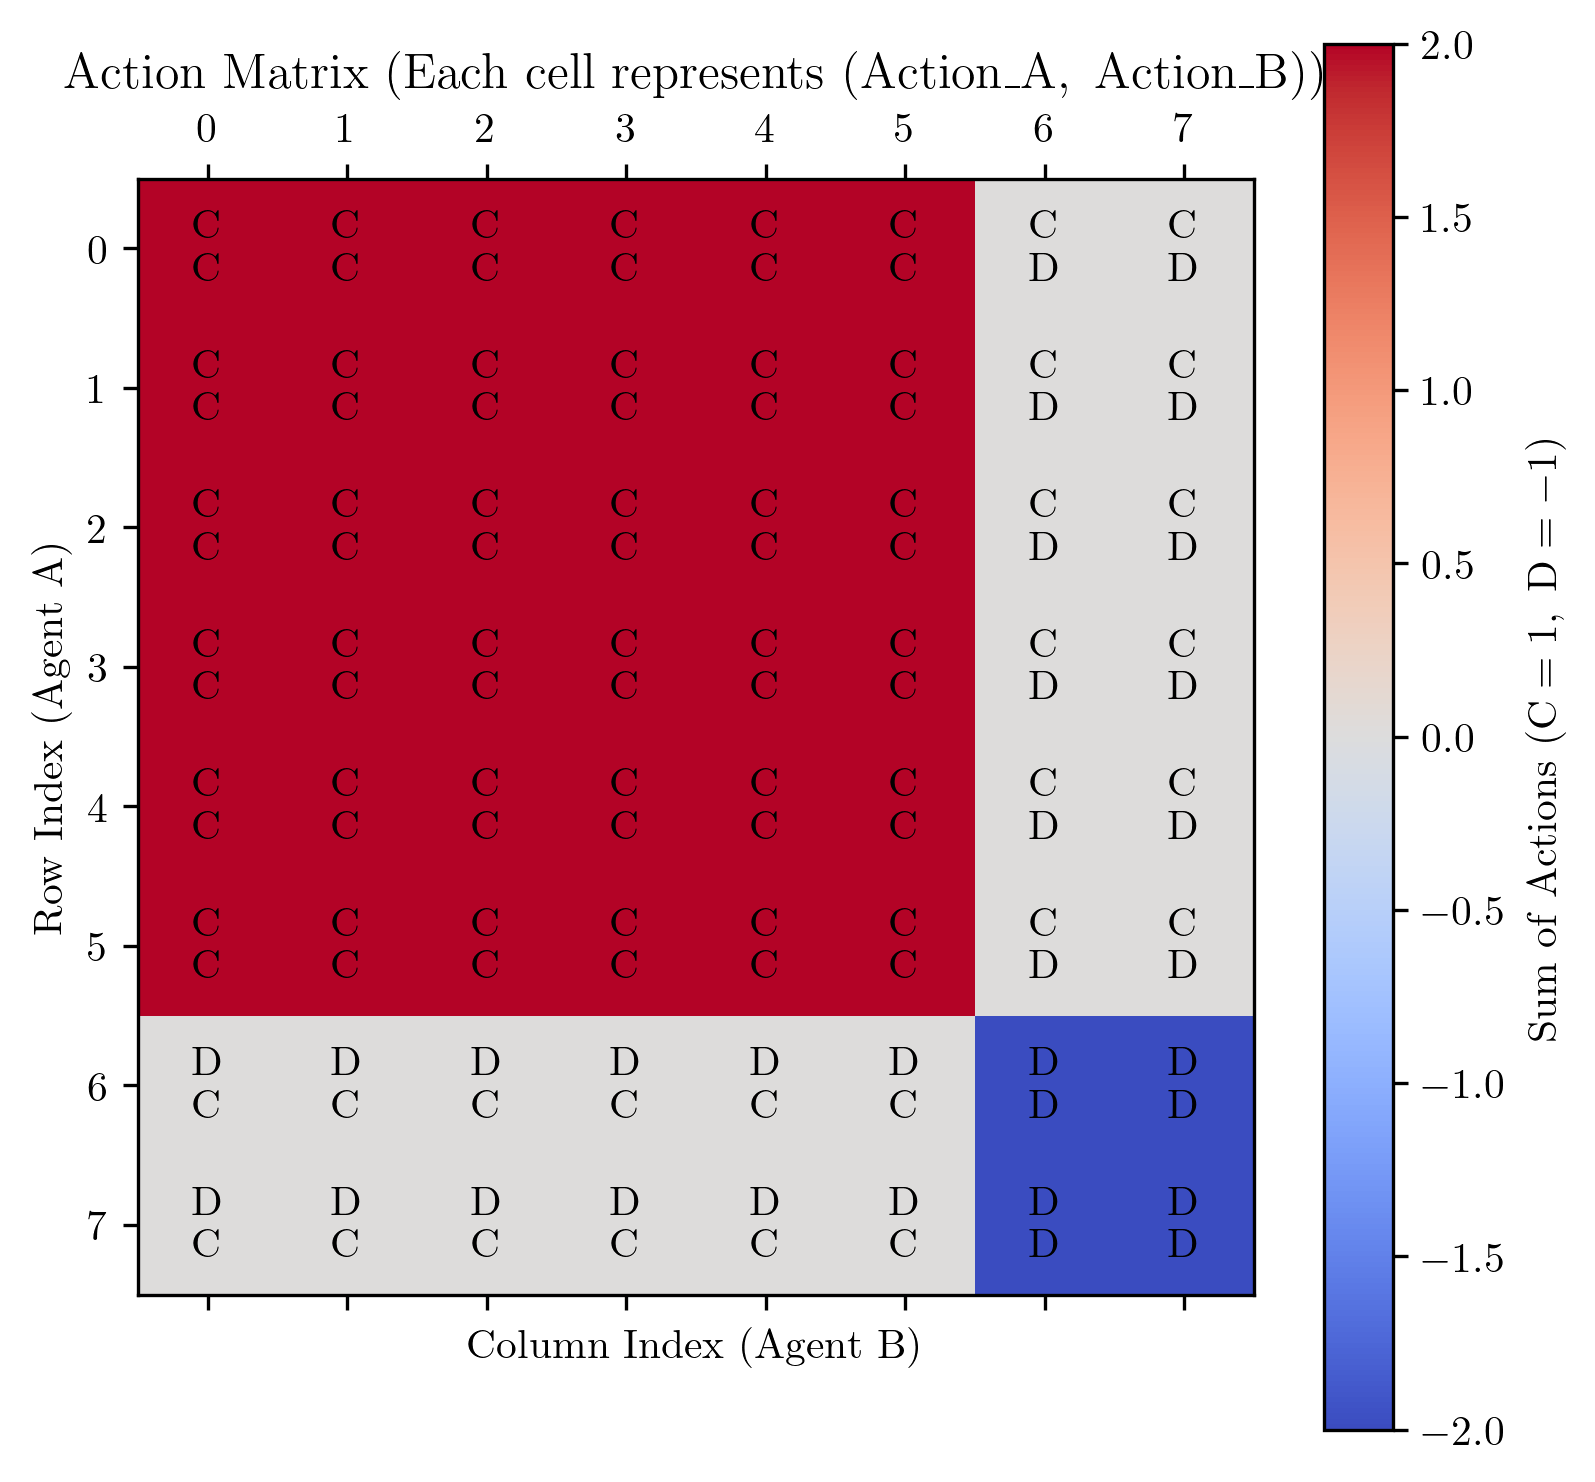

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl

# Apply LaTeX rendering with the CMU Modern font for all plot texts
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'CMU Serif'

# --------------------------------------------------------------------
# 1) Load your CSV file
# --------------------------------------------------------------------
csv_file_path = 'simulation_results/run_2025-03-26_18-03-09/detailed_logs.csv'
data = pd.read_csv(csv_file_path)

# Filter data for the first generation
first_generation_data = data[data['generation'] == 1]

# --------------------------------------------------------------------
# 2) Prepare an 8x8 matrix of tuples based on agent interactions
#     Each cell [i][j] corresponds to the interaction of Agent_(i+1) with Agent_(j+1),
#     so the interaction of Agent_1 with Agent_1 goes to cell 1-1.
# --------------------------------------------------------------------
action_matrix = [[None for _ in range(8)] for _ in range(8)]

# Map actions to 1 (Cooperate) and -1 (Defect)
action_map = {'C': 1, 'D': -1}

# Iterate over each interaction row in the first generation and place it in the matrix
for _, row in first_generation_data.iterrows():
    pair_str = row['pair']  # e.g., "Agent_1-Agent_1"
    agents_pair = pair_str.split('-')
    if len(agents_pair) == 2:
        agent_a_str, agent_b_str = agents_pair
        # Extract the numeric identifier from "Agent_X"
        agent_a_num = int(agent_a_str.split('_')[1])
        agent_b_num = int(agent_b_str.split('_')[1])
        # Adjust for 0-indexing in the matrix: cell (1-1) corresponds to index [0][0]
        i = agent_a_num - 1
        j = agent_b_num - 1

        actions = row['round_actions'].split('-')
        action_tuple = (action_map[actions[0]], action_map[actions[1]])
        action_matrix[i][j] = action_tuple

# --------------------------------------------------------------------
# 3) Create a numeric matrix (8x8) for display via matshow
#     For example, use the sum of the two values: (1, -1) => 0.
# --------------------------------------------------------------------
heatmap_values = np.zeros((8, 8), dtype=int )

for i in range(8):
    for j in range(8):
        if action_matrix[i][j] is not None:
            a, b = action_matrix[i][j]
            heatmap_values[i, j] = a + b
        else:
            heatmap_values[i, j] = 0

# --------------------------------------------------------------------
# 4) Plot the heatmap and annotate each cell with the action tuple 
#     (displaying "C" for 1 [Cooperation] and "D" for -1 [Deception]),
#     using LaTeX formatting with the CMU Modern font.
# --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6,6), dpi=300)
cax = ax.matshow(heatmap_values, cmap='coolwarm', vmin=-2, vmax=2)

for i in range(8):
    for j in range(8):
        if action_matrix[i][j] is not None:
            a, b = action_matrix[i][j]
            action_a = "C" if a == 1 else "D"
            action_b = "C" if b == 1 else "D"
            # Annotate each cell with LaTeX formatted text on two separate lines
            annotation = r"$\mathrm{" + action_a + r"}$" + "\n" + r"$\mathrm{" + action_b + r"}$"
            ax.text(j, i, annotation, ha='center', va='center', color='black', fontsize=10)
        else:
            ax.text(j, i, r"$\mathrm{--}$", ha='center', va='center', color='gray', fontsize=8)

# Set ticks and labels with LaTeX-formatted strings
ax.set_xticks(range(8))
ax.set_yticks(range(8))
ax.set_xlabel(r"$\mathrm{Column\ Index\ (Agent\ B)}$")
ax.set_ylabel(r"$\mathrm{Row\ Index\ (Agent\ A)}$")

# Add a colorbar with a LaTeX-formatted label
fig.colorbar(cax, ax=ax, label=r"$\mathrm{Sum\ of\ Actions\ (C=1,\ D=-1)}$")

plt.title(r"$\mathrm{Action\ Matrix\ (Each\ cell\ represents\ (Action\_A,\ Action\_B))}$")
plt.show()

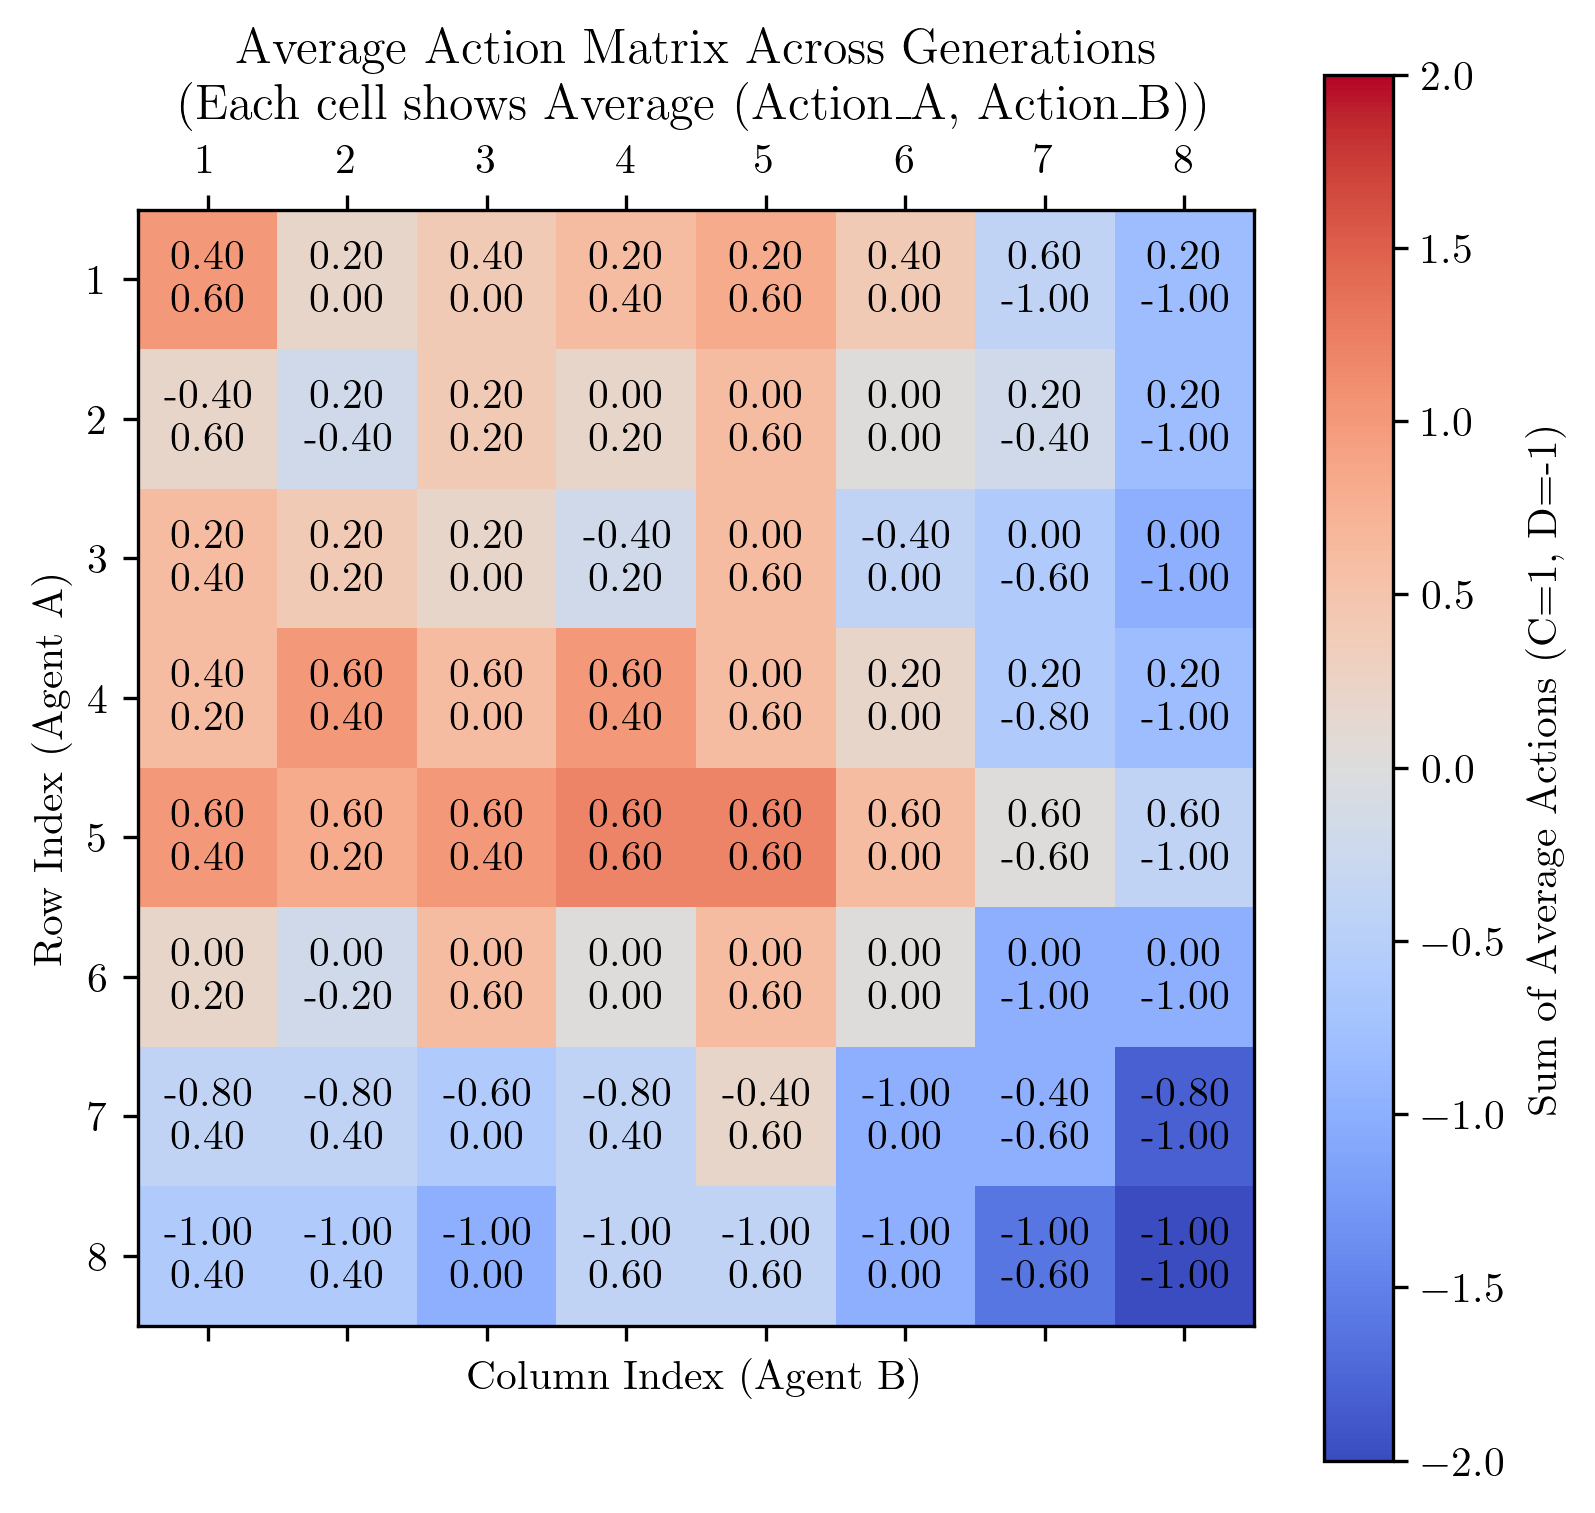

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configure Matplotlib to use LaTeX-style text with the CMU Serif font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["CMU Serif"],
})

# --------------------------------------------------------------------
# 1) Load your CSV file (using all generations)
# --------------------------------------------------------------------
csv_file_path = 'simulation_results/run_2025-03-26_18-03-09/detailed_logs.csv'
data = pd.read_csv(csv_file_path)

# --------------------------------------------------------------------
# 2) Aggregate the action tuples across generations
#     Each cell [i][j] corresponds to the interaction of Agent_(i+1) with Agent_(j+1)
# --------------------------------------------------------------------
n = 8
action_map = {'C': 1, 'D': -1}

# Create a structure to hold lists of tuples for each cell across generations.
# For example, matrix_data[i][j] will be a list of tuples (action_A, action_B)
matrix_data = [[[] for _ in range(n)] for _ in range(n)]

# Iterate over all rows in the CSV file
for _, row in data.iterrows():
    pair_str = row['pair']  # e.g., "Agent_1-Agent_1"
    agents_pair = pair_str.split('-')
    if len(agents_pair) == 2:
        agent_a_str, agent_b_str = agents_pair
        i = int(agent_a_str.split('_')[1]) - 1  # convert to 0-index
        j = int(agent_b_str.split('_')[1]) - 1
        actions = row['round_actions'].split('-')
        action_tuple = (action_map[actions[0]], action_map[actions[1]])
        matrix_data[i][j].append(action_tuple)

# Compute the average tuple for each cell (averaged across generations)
avg_matrix = [[None for _ in range(n)] for _ in range(n)]
for i in range(n):
    for j in range(n):
        if matrix_data[i][j]:
            avg_first = np.mean([t[0] for t in matrix_data[i][j]])
            avg_second = np.mean([t[1] for t in matrix_data[i][j]])
            avg_matrix[i][j] = (avg_first, avg_second)
        else:
            avg_matrix[i][j] = (0, 0)

# Create a numeric heatmap from avg_matrix.
# We use the sum of the two average values as the numeric value (range: -2 to 2).
avg_heatmap = np.zeros((n, n), dtype=float)
for i in range(n):
    for j in range(n):
        avg_heatmap[i, j] = avg_matrix[i][j][0] + avg_matrix[i][j][1]

# --------------------------------------------------------------------
# 3) Plot the heatmap with the average action tuples annotated
# --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)
cax = ax.matshow(avg_heatmap, cmap='coolwarm', vmin=-2, vmax=2)

# Annotate each cell with the averaged tuple (formatted to 2 decimals, on two lines)
for i in range(n):
    for j in range(n):
        avg_tuple = avg_matrix[i][j]
        ax.text(j, i, f"{avg_tuple[0]:.2f}\n{avg_tuple[1]:.2f}",
                ha='center', va='center', color='black', fontsize=10)

# Set axis ticks and labels (displaying 1 to 8 instead of 0 to 7)


ax.set_xticks(range(n))
ax.set_yticks(range(n))
ax.set_xticklabels([str(x) for x in range(1, n+1)])
ax.set_yticklabels([str(x) for x in range(1, n+1)])
ax.set_xlabel("Column Index (Agent B)")
ax.set_ylabel("Row Index (Agent A)")

# Add a colorbar indicating the sum of the average actions
fig.colorbar(cax, ax=ax, label="Sum of Average Actions (C=1, D=-1)")

plt.title("Average Action Matrix Across Generations\n(Each cell shows Average (Action_A, Action_B))")
plt.show()

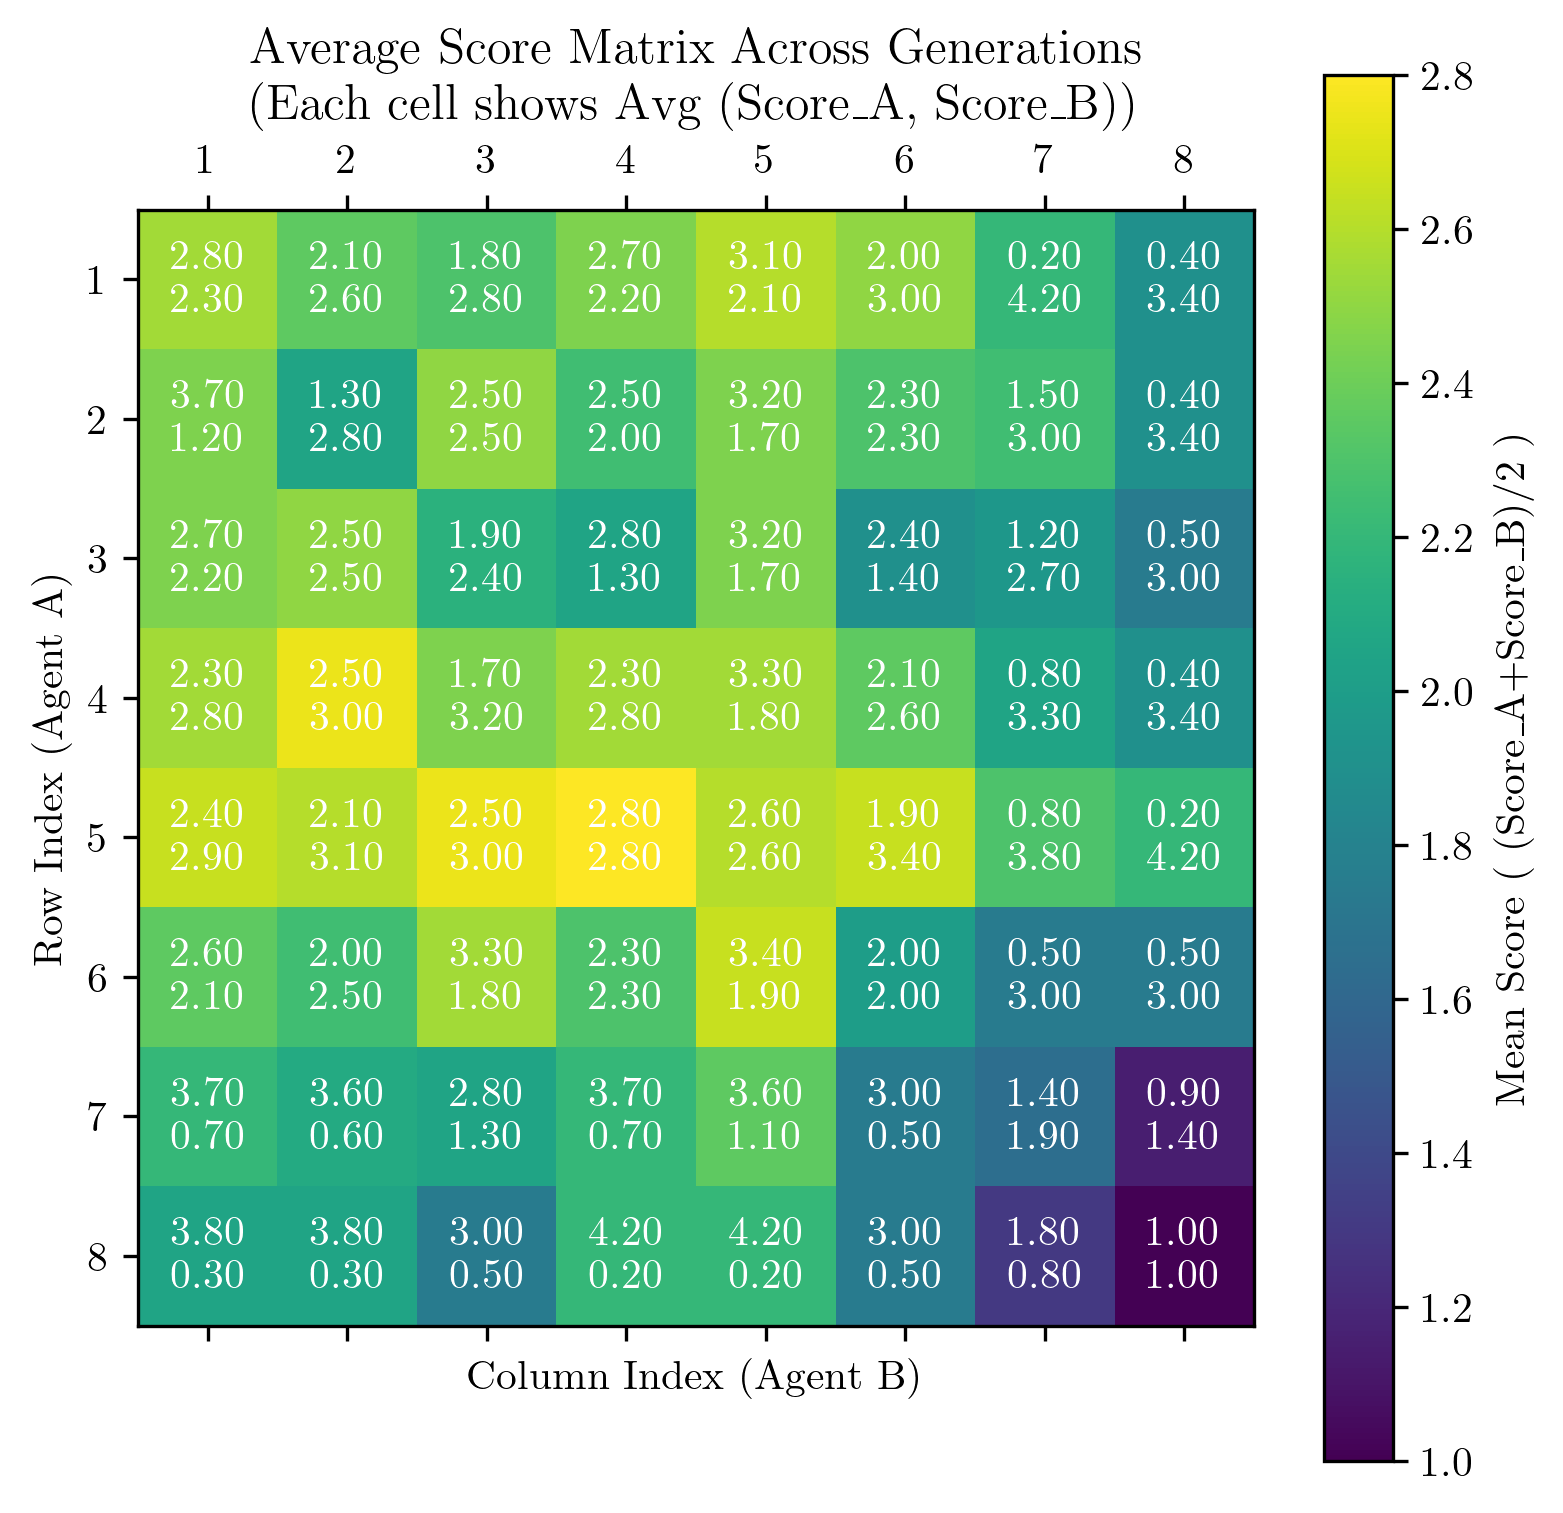

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pprint as pp

# Apply LaTeX-based rendering using the CMU Modern font (CMU Serif) for all text in the plots.
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["CMU Serif"]
})

# --------------------------------------------------------------------
# 1) Load your CSV file (using all generations)
# --------------------------------------------------------------------
csv_file_path = 'simulation_results/run_2025-03-26_18-03-09/detailed_logs.csv'
data = pd.read_csv(csv_file_path)

# --------------------------------------------------------------------
# 2) Build a data structure for scores per cell and per generation.
#     Each cell [i][j] (with i, j from 0 to 7 corresponding to Agent_(i+1) and Agent_(j+1))
#     will store a dictionary: { generation: list of (score_A, score_B) }.
# --------------------------------------------------------------------
n = 8
cell_data = {}
for i in range(n):
    for j in range(n):
        cell_data[(i, j)] = {}

for _, row in data.iterrows():
    pair_str = row['pair']  # e.g., "Agent_1-Agent_1"
    agents_pair = pair_str.split('-')
    if len(agents_pair) == 2:
        agent_a_str, agent_b_str = agents_pair
        i = int(agent_a_str.split('_')[1]) - 1  # convert to 0-index (Agent_1 $\rightarrow$ index 0)
        j = int(agent_b_str.split('_')[1]) - 1
        generation = int(row['generation'])
        payoffs_str = row['payoffs']  # e.g., "3-3"
        payoff_parts = payoffs_str.split('-')
        payoff_a = float(payoff_parts[0])
        payoff_b = float(payoff_parts[1])
        if generation not in cell_data[(i, j)]:
            cell_data[(i, j)][generation] = []
        cell_data[(i, j)][generation].append((payoff_a, payoff_b))

# (Optional) Print cell_data for debugging:
# pp.pprint(cell_data)

# --------------------------------------------------------------------
# 3) For each cell, compute the overall average score per generation.
#     For each cell, for every generation present, compute the average score (Score_A and Score_B)
#     and then average these generation–by–generation values.
#
#     In other words, if for a cell you have generations 1,2,...,N with average scores:
#         (avg_A1, avg_B1), (avg_A2, avg_B2), ..., (avg_AN, avg_BN)
#     then overall average for Score_A is: (avg_A1+avg_A2+...+avg_AN)/N, and similarly for Score_B.
# --------------------------------------------------------------------
avg_score_tuple = [[(0, 0) for _ in range(n)] for _ in range(n)]
avg_score_heatmap = np.zeros((n, n), dtype=float)

for i in range(n):
    for j in range(n):
        gen_dict = cell_data[(i, j)]
        gens = sorted(gen_dict.keys())
        if len(gens) == 0:
            avg_score_tuple[i][j] = (0, 0)
            avg_score_heatmap[i, j] = 0
        else:
            sum_A = 0.0
            sum_B = 0.0
            count = 0
            for g in gens:
                scores = gen_dict[g]
                avg_A = np.mean([s[0] for s in scores])
                avg_B = np.mean([s[1] for s in scores])
                sum_A += avg_A
                sum_B += avg_B
                count += 1
            overall_avg_A = sum_A / count
            overall_avg_B = sum_B / count
            avg_score_tuple[i][j] = (overall_avg_A, overall_avg_B)
            # For the heatmap, we use the average of the two scores.
            avg_score_heatmap[i, j] = (overall_avg_A + overall_avg_B) / 2

# (Optional) Print the average score matrix:
# pp.pprint(avg_score_tuple)

# --------------------------------------------------------------------
# 4) Plot the 8x8 heatmap with cell annotations.
#     Each cell shows the overall average score tuple (Score_A, Score_B)
#     and the cell color corresponds to the mean of these two values.
# --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)
cax = ax.matshow(avg_score_heatmap, cmap='viridis')

# Annotate each cell with the average score tuple (formatted to 2 decimals on separate lines)
for i in range(n):
    for j in range(n):
        avg_tuple = avg_score_tuple[i][j]
        ax.text(j, i, f"{avg_tuple[0]:.2f}\n{avg_tuple[1]:.2f}",
                ha='center', va='center', color='white', fontsize=10)

# Adjust ticks and labels (displaying agent numbers 1 to 8 instead of 0 to 7)
ax.set_xticks(range(n))
ax.set_yticks(range(n))
ax.set_xticklabels([str(x) for x in range(1, n+1)])
ax.set_yticklabels([str(x) for x in range(1, n+1)])
ax.set_xlabel("Column Index (Agent B)")
ax.set_ylabel("Row Index (Agent A)")

fig.colorbar(cax, ax=ax, label="Mean Score ( (Score_A+Score_B)/2 )")

plt.title("Average Score Matrix Across Generations\n(Each cell shows Avg (Score_A, Score_B))")
plt.show()